<a href="https://colab.research.google.com/github/Chetan2003/RTT-Estimation-for-mobile-to-mobile/blob/main/HagosPaperReplication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preparing Training Data (Low Mobility)...
Training Hagos model on low mobility data...
Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.0277
Epoch 2/50
237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 1.2574e-04
Epoch 3/50
237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 1.3372e-04
Epoch 4/50
237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.5830e-04
Epoch 5/50
237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.9631e-04
Epoch 6/50
237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4.2537e-04
Epoch 7/50
237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.2740e-04
Epoch 8/50
237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2.2716e-04
Epoch 9/50
237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 4.4927e-04
Epoch 10/50
237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.4580e-04
Epoch 11/50
237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.4220e-04
Epoch 12/50
237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.0317e-04
Epoch 13/50
237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.1097e-04
Epoch 14/50
237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.3528e-04
Epoch 15/50


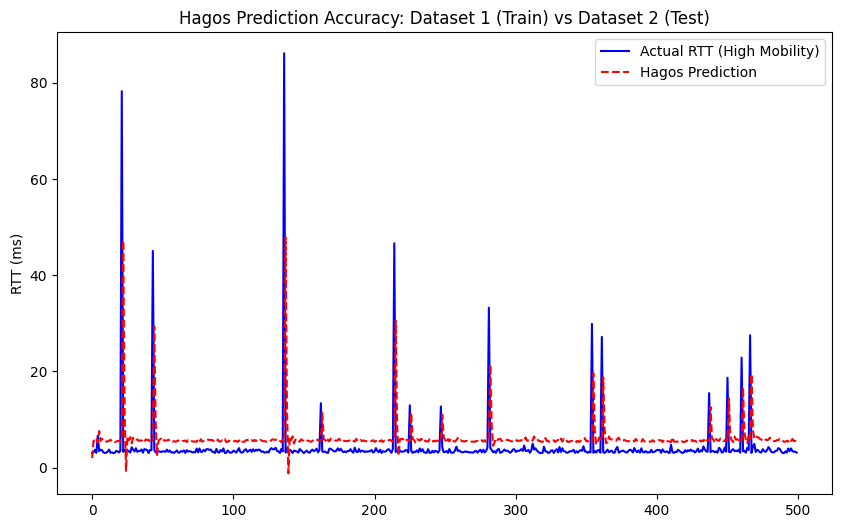

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# --- 1. Hagos Model Configuration ---
LOOKBACK = 188
HIDDEN_UNITS = 36
LR = 0.020

def build_hagos_model():
    model = Sequential([
        LSTM(HIDDEN_UNITS, input_shape=(LOOKBACK, 1), activation='tanh'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=LR), loss='mse')
    return model

def prepare_data(csv_file, window_size, scaler=None, fit_scaler=False):
    df = pd.read_csv(csv_file)
    rtt_values = df['RTT_ms'].values.reshape(-1, 1)

    if fit_scaler:
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(rtt_values)
    else:
        scaled_data = scaler.transform(rtt_values)

    X, y = [], []
    for i in range(len(scaled_data) - window_size):
        X.append(scaled_data[i : i + window_size])
        y.append(scaled_data[i + window_size])
    return np.array(X), np.array(y), scaler

# --- 2. Train on Dataset 1 (Low Mobility) ---
print("Preparing Training Data (Low Mobility)...")
X_train, y_train, shared_scaler = prepare_data('low_mob.csv', LOOKBACK, fit_scaler=True)

model = build_hagos_model()
print("Training Hagos model on low mobility data...")
model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=1)

# --- 3. Test on Dataset 2 (High Mobility) ---
print("\nPreparing Testing Data (High Mobility)...")
# Note: Use the scaler fitted on the TRAINING data to avoid leakage
X_test, y_test, _ = prepare_data('high_mob.csv', LOOKBACK, scaler=shared_scaler)

print("Testing model on unseen high mobility data...")
predictions_scaled = model.predict(X_test)

# Convert back to ms
predictions = shared_scaler.inverse_transform(predictions_scaled)
actual = shared_scaler.inverse_transform(y_test.reshape(-1, 1))

# --- 4. Plotting the results ---
plt.figure(figsize=(10, 6))
plt.plot(actual[:500], label='Actual RTT (High Mobility)', color='blue')
plt.plot(predictions[:500], label='Hagos Prediction', color='red', linestyle='--')
plt.title('Hagos Prediction Accuracy: Dataset 1 (Train) vs Dataset 2 (Test)')
plt.ylabel('RTT (ms)')
plt.legend()
plt.show()

Training on Stable (Low Mobility) Data...
Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2324
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0019
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.5434e-04
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.9865e-05
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9949e-05
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.9516e-05
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.9070e-05
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.8367e-05
Epoch 9/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.7766e-05
Epoch 10/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.8022e-05
Epoch 11/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7456e-05
Epoch 12/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7306e-05
Epoch 13/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7168e-05
Epoch 14/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6485e-05
Epoch 15/100
60/60 ━━━━━━━━━━━━━━

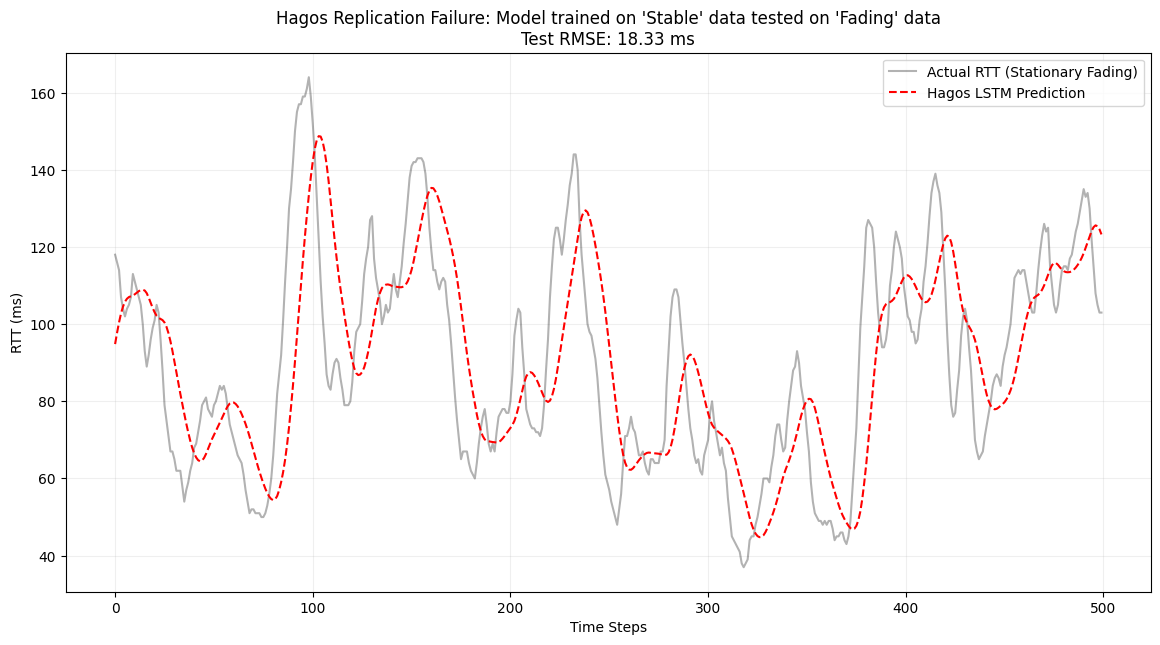

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import math

# --- 1. DATA PREPARATION FUNCTIONS ---
def create_sequences(data, look_back=20):
    X, y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

# --- 2. LOAD SEPARATE DATASETS ---
# Load Training Data (Stable/Low Mobility)
train_df = pd.read_csv("low_mobility.csv")
train_values = train_df['RTT_ms'].values.reshape(-1, 1)

# Load Testing Data (Noisy/Stationary Fading)
test_df = pd.read_csv("stationary_fading.csv")
test_values = test_df['RTT_ms'].values.reshape(-1, 1)

# --- 3. PREPROCESSING ---
# Fit scaler ONLY on training data to mimic real-world deployment
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(train_values)
scaled_test = scaler.transform(test_values) # Transform test data using training scale

look_back = 20
X_train, y_train = create_sequences(scaled_train, look_back)
X_test, y_test = create_sequences(scaled_test, look_back)

# Reshape for LSTM: [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# --- 4. BUILD HAGOS MODEL (Architecture from paper) ---
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(15, activation='relu')) # 15-dim hidden state
model.add(Dense(1))

optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss='mean_squared_error', optimizer=optimizer)

# --- 5. TRAINING ON STABLE DATA ---
print("Training on Stable (Low Mobility) Data...")
model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=256,
    verbose=1
)

# --- 6. PREDICTION ON NOISY DATA ---
print("Testing on Fading (Noisy) Data...")
test_predict = model.predict(X_test)

# Invert predictions
test_predict_orig = scaler.inverse_transform(test_predict)
y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
test_score = math.sqrt(mean_squared_error(y_test_orig, test_predict_orig))
print(f"\nTest RMSE on Fading Data: {test_score:.2f} ms")

# --- 7. PLOTTING THE FAILURE ---
plt.figure(figsize=(14, 7))
plt.plot(y_test_orig[:500], label='Actual RTT (Stationary Fading)', color='black', alpha=0.3)
plt.plot(test_predict_orig[:500], label='Hagos LSTM Prediction', color='red', linestyle='--')

plt.title(f"Hagos Replication Failure: Model trained on 'Stable' data tested on 'Fading' data\nTest RMSE: {test_score:.2f} ms")
plt.xlabel("Time Steps")
plt.ylabel("RTT (ms)")
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()